In [1]:
import sys
import numpy as np
# insert at position 1 in the path, as 0 is the path of this file.
sys.path.insert(1, r'..\modules\\')
import seaborn as sns
import matplotlib.pyplot as plt
from modelclass import ModelTrainer

# Overview

1. Logistic Classifier Default
2. XGB Classifier Default
3. XGB Classifier feat_eng1
4. XGB Classifier feat_eng2
3. XGB Classifier Resample
4. XGB Hyperparameter Tuning

In [2]:
mt = ModelTrainer(model='xgb')
mt.load_model('xgb6')
mt.confusion_matrix

[23:29:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Threshold=0.320857, F-Score=0.657
precision, recall, threshold, f1score attributes updated
Best Threshold=0.076146, G-Mean=0.836
tpr, fpr, gmean attributes updated


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


feature_importance attribute updated


array([[17016,   393],
       [  660,  1007]], dtype=int64)

<AxesSubplot:>

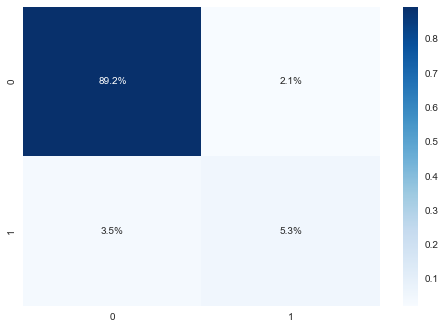

In [7]:
sns.heatmap(mt.confusion_matrix/np.sum(mt.confusion_matrix), annot=True, 
            fmt='.1%', cmap='Blues')

<AxesSubplot:>

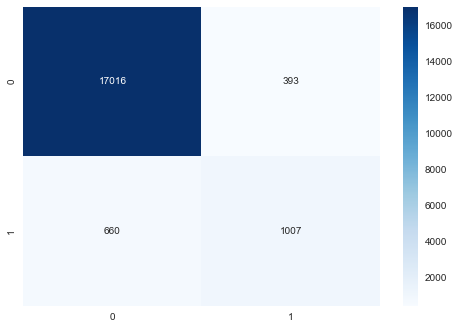

In [6]:
sns.heatmap(mt.confusion_matrix, annot=True, fmt='', cmap='Blues')